In [30]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np

In [31]:
lx=ly = 100e-9
lz = 10e-9
dx=dy=dz = 5e-9
Ms = 8e5
A = 1.3e-11
H = 8e4*np.array([0.8,0.6,0])
alpha = 0.008
gamma0 = 2.211e5

In [32]:
mesh = df.Mesh(p1=(0, 0, 0), p2=(lx, ly, lz), cell=(dx, dy, dz))
system = mm.System(name='fmr')

system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, nvdim=3, value=(0, 0, 1), norm=Ms)

In [33]:
md = oc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner)[2025/01/17 18:09]... (6.6 s)


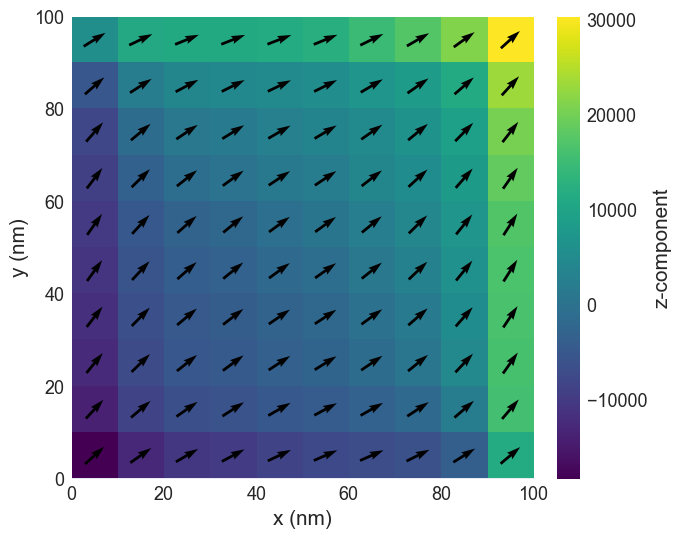

In [34]:
system. m.sel("z").resample((10,10)).mpl()

In [35]:
system.energy.zeeman.H=H

In [36]:
T = 20e-9
n = 4000

td = oc.TimeDriver()
td.drive(system, t=T, n=n)

Running OOMMF (ExeOOMMFRunner)[2025/01/17 18:09]... (67.2 s)


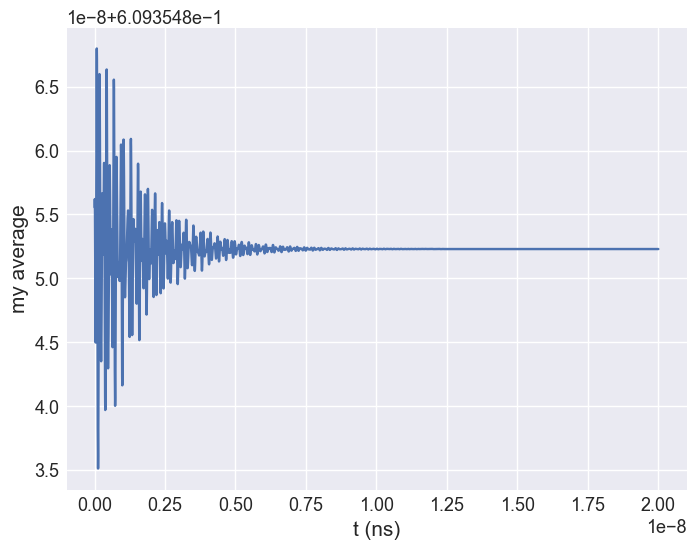

In [41]:
import matplotlib.pyplot as plt
t = system.table.data["t"].values
my = system.table.data["my"].values

plt.figure(figsize=(8, 6))
plt.plot(t, my)
plt.xlabel("t (ns)")
plt.ylabel("my average")
plt.grid()

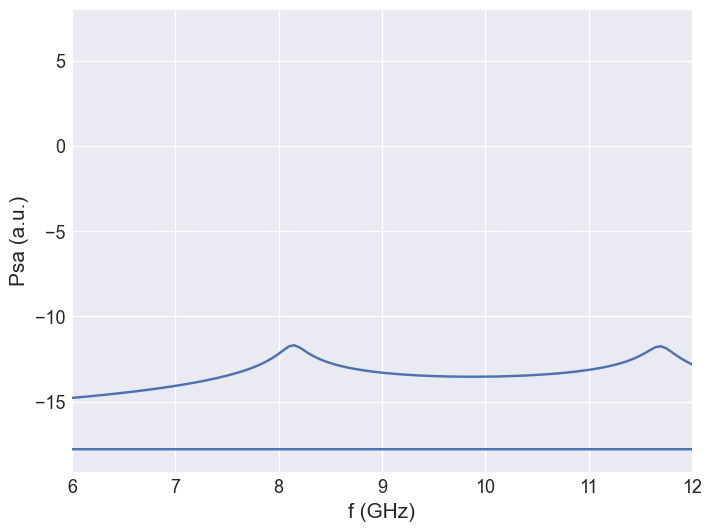

In [42]:
import scipy.fft
psd = np.log10(np.abs(scipy.fft.fft(my))**2)
f_axis = scipy.fft.fftfreq(4000, d=20e-9/4000)

plt.plot(f_axis / 1e9, psd)
plt.xlim([6,12])
plt.xlabel("f (GHz)")
plt.ylabel("Psa (a.u.)")
plt.grid()